/mnt/OpenFormat/python


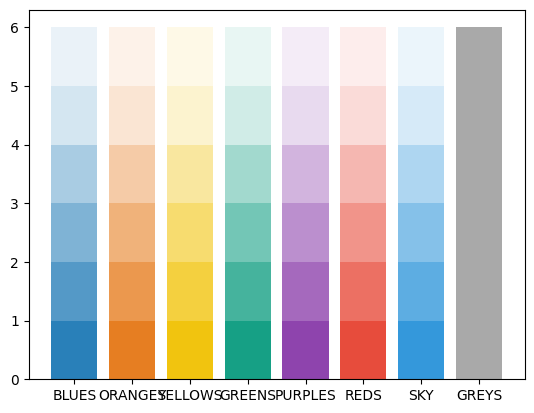

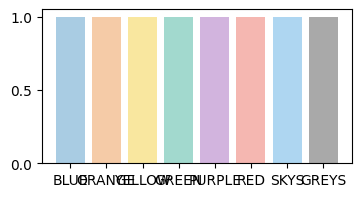

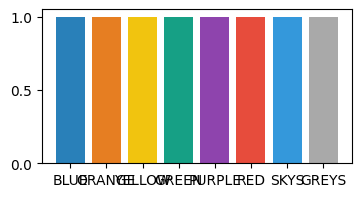

<Figure size 400x200 with 0 Axes>

In [1]:
import json
import os
import sys
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import matplotlib
from stylelib import *
from process_helper import *
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(2)
_, line_colors = select_color_idx(5)

matplotlib.rcParams.update({'font.size': 14})
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *

In [13]:
name =  '../outputs/projection_exp_v2.csv'
df = pd.read_csv(name)
df_avg = df.groupby(['format', 'num_rows', 'num_cols'], as_index=False).mean().set_index(['format', 'num_rows'])

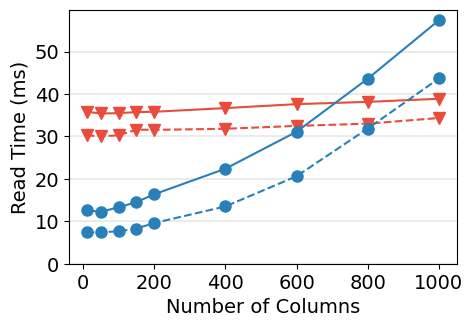

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.3))
for i in range(1):
    num_rows = 100000
    ax.plot(df_avg.loc['parquet', num_rows]['num_cols'], df_avg.loc['parquet', num_rows]['time'],color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
    ax.plot(df_avg.loc['parquet', num_rows]['num_cols'], df_avg.loc['parquet', num_rows]['time_preload'],color=line_colors[C_PQ],marker="v", label='Parquet Preload',ls='--', ms=8)
    ax.plot(df_avg.loc['orc', num_rows]['num_cols'], df_avg.loc['orc', num_rows]['time'],color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
    ax.plot(df_avg.loc['orc', num_rows]['num_cols'], df_avg.loc['orc', num_rows]['time_preload'],color=line_colors[C_ORC],marker="o", label='ORC Preload',ls='--', ms=8)
    if i == 0:
        ax.set_ylabel("Read Time (ms)", fontsize=14)
        # ax.set_title('100k Rows', fontsize=14)
    else:
        ax.set_title('10k Rows', fontsize=14)
    ax.set_xlabel('Number of Columns')
    ax.set_ylim(bottom=0)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.35)
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',bbox_to_anchor=((0.5,1.0)), ncol=4, frameon=False, prop={'size': 10}, columnspacing=0.5, handletextpad=0.2,markerscale=0.8)
# plt.tight_layout()
plt.savefig(f'../figures/projection.pdf', bbox_inches = 'tight')
plt.show()